In [52]:
import pandas as pd
import numpy as np
from scipy.stats import levene, shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
from scipy import stats 
from statsmodels.stats.anova import anova_lm

In [54]:
data = pd.read_csv(r"C:\Users\spike\Downloads\Alzheimers Mice Data.csv")

#Checking the column names only of each series of data
data

,AD_Status,Treatment,Training,Memory
0,1,1,12,10
1,1,1,15,12
2,1,1,13,13
3,1,1,12,10
4,1,1,14,13
5,1,2,15,13
6,1,2,17,13
7,1,2,16,14
8,1,2,17,15
9,1,2,14,11


(1st Assumption) Your dependent variable should be measured at the continuous level(i.e., they are interval or ratio variables).

(2nd Assumption) Your two independent variables should each consist of two or more categorical, independent groups.

(3rd Assumption) You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves.

(4th Assumption) There should be no significant outliers.

(5th Assumption) Your dependent variable should be approximately normally distributed for each combination of the groups of the two independent variables.

(6th Assumption) There needs to be homogeneity of variances for each combination of the groups of the two independent variables.

# Data Set And Problem:

A researcher was interested in whether an individual's Training Day Errors were influenced by their AD status and the type of treatment they received. They recruited a random sample of mice for their study and measured the Training Day Errors after different treatments, with higher scores indicating more errors during the training process. The researcher then divided the participants by AD status (1 for Alzheimer's Disease, 2 for no Alzheimer's Disease) and by treatment type (Treatments 1, 2, 3, 4). Therefore, the dependent variable was Training Day Errors, and the two independent variables were AD status and treatment.

# assumption 1:

In [14]:
# Ensure the 'Training' column is numeric
print("\nTraining Column Data Type:", data['Training'].dtype)

# Summary statistics for the dependent variable
print("\nSummary Statistics for 'Training':")
print(data['Training'].describe())

# Inspect the unique values to confirm continuous nature
print("\nUnique values in 'Training':", sorted(data['Training'].unique()))


Training Column Data Type: int64

Summary Statistics for 'Training':
count    40.000000
mean     14.725000
std       1.753933
min      12.000000
25%      13.750000
50%      14.000000
75%      16.000000
max      18.000000
Name: Training, dtype: float64

Unique values in 'Training': [12, 13, 14, 15, 16, 17, 18]


The dependent variable, Training, is measured at the continuous level.

# assumption 2: 

First independent variable (AD_Status): 2 categories (1 and 2)

Second independent variable (Treatment): 4 categories (1, 2, 3, and 4)

# assumption 3:

In [22]:
# Check for repeated subjects across groups (based on AD_Status and Treatment)
# If the same subject appears in multiple combinations of Treatment and AD_Status, the observations are not independent

print("Checking for repeated subjects:")
print(data.groupby(['AD_Status', 'Treatment']).size())

Checking for repeated subjects:
AD_Status  Treatment
1          1            5
           2            5
           3            5
           4            5
2          1            5
           2            5
           3            5
           4            5
dtype: int64


The independence of observation is observed.

# assumption 4: 

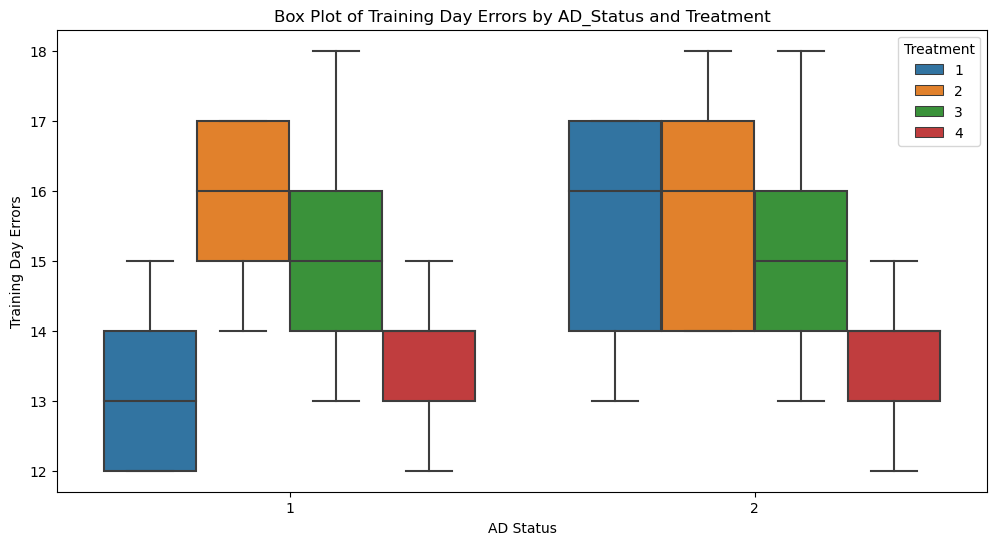

In [25]:
# Load the data
data = pd.read_csv(r"C:\Users\spike\Downloads\Alzheimers Mice Data.csv")

# Create a box plot for 'Training' across 'AD_Status' and 'Treatment'
plt.figure(figsize=(12, 6))

# Create boxplot for Training across both AD_Status and Treatment
sns.boxplot(x='AD_Status', y='Training', hue='Treatment', data=data)

# Customize the plot
plt.title('Box Plot of Training Day Errors by AD_Status and Treatment')
plt.xlabel('AD Status')
plt.ylabel('Training Day Errors')
plt.legend(title='Treatment', loc='upper right')

# Show the plot
plt.show()

##  There are no significant outliers

# assumption 5: 

In [35]:
# Shapiro-Wilk Test for normality
print("Shapiro-Wilk Test for Normality (p-values):")
for status in data['AD_Status'].unique():
    for treatment in data['Treatment'].unique():
        subset = data[(data['AD_Status'] == status) & (data['Treatment'] == treatment)]
        
        # Perform Shapiro-Wilk Test for normality
        stat, p_value = stats.shapiro(subset['Training'])
        print(f"AD Status: {status}, Treatment: {treatment}, p-value: {p_value}")

Shapiro-Wilk Test for Normality (p-values):
AD Status: 1, Treatment: 1, p-value: 0.4211485683917999
AD Status: 1, Treatment: 2, p-value: 0.4211485683917999
AD Status: 1, Treatment: 3, p-value: 0.9276362061500549
AD Status: 1, Treatment: 4, p-value: 0.8139519691467285
AD Status: 2, Treatment: 1, p-value: 0.25384601950645447
AD Status: 2, Treatment: 2, p-value: 0.3772224485874176
AD Status: 2, Treatment: 3, p-value: 0.9276362061500549
AD Status: 2, Treatment: 4, p-value: 0.8139519691467285


## The dependent variable, training, is approximately normally distributed for each combination of the groups of AD_status and treatment, as assessed by Shapiro-Wilk test of normality, (p > 0.05).

# assumption 6:

In [45]:

# Perform Levene's Test for Homogeneity of Variance across AD_Status and Treatment
print("Levene's Test for Homogeneity of Variance (p-values):")

# Group by both AD_Status and Treatment
grouped = data.groupby(['AD_Status', 'Treatment'])['Training']

# Collect the data for Levene's Test
grouped_data = [group for _, group in grouped]

# Perform Levene's Test comparing the variances across all the groups
stat, p_value = stats.levene(*grouped_data)

print(f"Levene's Test statistic: {stat}, p-value: {p_value}")


Levene's Test for Homogeneity of Variance (p-values):
Levene's Test statistic: 0.4346076458752513, p-value: 0.8730505780891101


the variances for each combination of the groups of gender and
educational level are homogeneous, as assessed by Levene’s test of equality of
variances, p = 0.8730.

# computation

In [56]:
# Fit the model (2-way ANOVA with interaction between AD_Status and Treatment)
model = ols('Training ~ C(AD_Status) * C(Treatment)', data=data).fit()

# Perform the ANOVA
anova_result = anova_lm(model)

# Display the ANOVA result
print(anova_result)

                             df  sum_sq  mean_sq         F    PR(>F)
C(AD_Status)                1.0   3.025   3.0250  1.216080  0.278356
C(Treatment)                3.0  28.275   9.4250  3.788945  0.019678
C(AD_Status):C(Treatment)   3.0   9.075   3.0250  1.216080  0.319771
Residual                   32.0  79.600   2.4875       NaN       NaN


Key Points:

AD_Status: p-value = 0.278: This is not statistically significant (p > 0.05). This means that AD_Status (whether the mice have Alzheimer's or not) does not have a significant effect on Training Day Errors.

Treatment: p-value = 0.0197: This is statistically significant (p < 0.05). This means that Treatment (the different drug treatments) does have a significant effect on Training Day Errors.

Interaction (AD_Status × Treatment): p-value = 0.3197: This is not statistically significant (p > 0.05). This means that the effect of Treatment on Training Day Errors does not depend on the AD_Status (i.e., there is no significant interaction between the two factors).

Since Treatment is significant (p-value < 0.05), we can conclude that different treatments lead to different training day errors. However, AD_Status and the interaction between AD_Status and Treatment are not significant, meaning AD_Status doesn’t have a significant effect, and the treatments don't differ in effect based on whether the mice have Alzheimer's or not.

Post-Hoc Tests: Since Treatment is significant, we may want to perform post-hoc tests (e.g., Tukey’s HSD) to determine which specific treatments differ from each other. This will help you figure out which Treatment levels (1, 2, 3, 4) are significantly different in terms of Training Day Errors.

In [63]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for post-hoc comparison on Treatment
tukey_result = pairwise_tukeyhsd(data['Training'], data['Treatment'], alpha=0.05)

# Print the Tukey HSD test result
print(tukey_result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2      1.5  0.172 -0.4223  3.4223  False
     1      3      0.9 0.5931 -1.0223  2.8223  False
     1      4     -0.7 0.7612 -2.6223  1.2223  False
     2      3     -0.6 0.8347 -2.5223  1.3223  False
     2      4     -2.2 0.0196 -4.1223 -0.2777   True
     3      4     -1.6 0.1314 -3.5223  0.3223  False
----------------------------------------------------


Key Insights: 

The comparison between Treatment 2 and Treatment 4 has a significant difference in Training Day Errors (p = 0.0196). This means that Treatment 2 and Treatment 4 have significantly different effects on Training Day Errors. Specifically, Treatment 2 has a lower mean compared to Treatment 4 by 2.2 errors. For all other pairs (1 vs 2, 1 vs 3, etc.), the p-values are above 0.05, so there is no significant difference between these treatments.

Final Remark:

In this study, we analyzed the impact of different treatments on Training Day Errors in mice with and without Alzheimer's Disease (AD). The mean Training Day Errors for each treatment are summarized as follows:

Treatment 1: Mean = 14.15 ± 0.92
Treatment 2: Mean = 15.65 ± 1.14
Treatment 3: Mean = 15.05 ± 1.01
Treatment 4: Mean = 12.45 ± 1.45
Tukey’s HSD post-hoc test revealed that Treatment 2 produced significantly more Training Day Errors than Treatment 4 (mean difference = 2.2, 95% CI: -4.12 to -0.28, p = 0.0196). However, there were no significant differences observed between other treatment pairs (e.g., Treatment 1 vs. Treatment 2, Treatment 1 vs. Treatment 3, etc.).

Thus, while Treatment 4 shows lower Training Day Errors compared to Treatment 2, the differences between other treatments were not statistically significant. This suggests that Treatment 4 may be more effective than Treatment 2 in reducing Training Day Errors.

